### LEARNING CURVES

+ Comparing 3 different Degree models.

    + 300 degree polynomial model.
    + 2 degree model.
    + Linear Model.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

## using scikit learn method
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

[-0.75275929]
[-0.75275929  0.56664654]


Plotting the Curve for the above mentioned models.

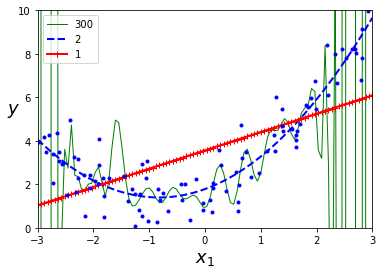

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

`Linear Model :- degree is 1.`
+ In that model, the line is a stright Line.
+ The model is Underfitting.

`Quadratic Model, Degree = 2`
+ The model generalizes well on the training data.

`Higher Degree : degree = 300.`
+ The model is overfitting Clearly.

How do you know the Model is Overfitting or Underfitting.

There are two ways.
   + Looking at the Perfomance.
   + Looking at the Learning Curves.

When we look at the Perfomance.

Overfitting : - 
        `When the model performs well on the training set, and generalizes poorly on validation set. then we can say that the model is Overfitting.`
        
Underfitting : -
        `When the model performs poorly on both training and cross validation set, then the model is Underfitting`

Next method is to Understand whether the model is Overfit or Underfit by Looking at the Learning Curves.

In [6]:
## function to plot the learning curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Plotting the Learning Curve for Linear Regression.

+ Here for Training data.
+ As the training set size increases, the Error also increases,
+ And it cannot generalizes very well.


+ On the Cross-validation data points.
+ when the cv sets are less, the error was very high.
+ As the model seen more data, the Error get decreased and consolidates.
+ Even the Error is High.

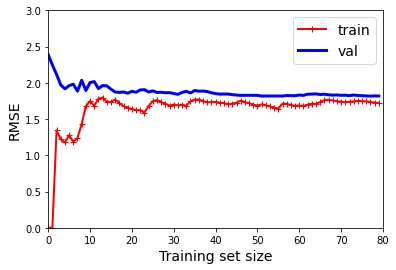

In [8]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()                                     

Plotting the Curve for 10-degree polynomial.

+ The figure is almost same as previous.

+ Two major points.

+ The Error on the training data is much Lower than the Linear Regression Model.

+ There is a gap between the Curves. This means model performs Significantly better on the training data than the validation data.

+ ie, model is Overfittiing.

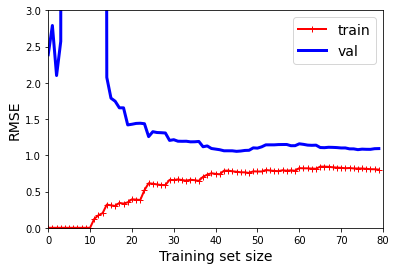

In [9]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
plt.show() 

degree = 20

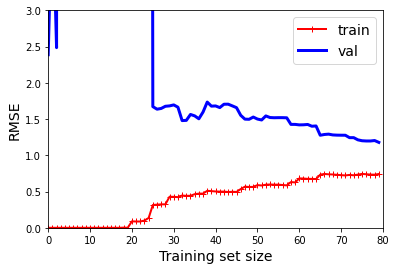

In [11]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
plt.show() 